In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#SECTION 1: Dataset Overview & Cleaning


In [ ]:
# Load the Dataset

netflix = pd.read_csv('data.csv')


# 🧾 Dataset Overview

print("Original shape:", netflix.shape)
print("\nData types:\n", netflix.dtypes)


#  Missing Values

missing_values = netflix.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Data Cleaning


# 1. Fill missing genres with 'Unknown'
netflix['genres'] = netflix['genres'].fillna('Unknown')

# 2. Drop rows with missing releaseYear
netflix = netflix.dropna(subset=['releaseYear'])

# 3. Convert releaseYear to integer
netflix['releaseYear'] = netflix['releaseYear'].astype(int)

# 4. Convert IMDb ratings and vote counts to numeric
netflix['imdbAverageRating'] = pd.to_numeric(netflix['imdbAverageRating'], errors='coerce')
netflix['imdbNumVotes'] = pd.to_numeric(netflix['imdbNumVotes'], errors='coerce')

# 5. Drop duplicate records
netflix = netflix.drop_duplicates()

# Final dataset check
print("\nCleaned shape:", netflix.shape)


Original shape: (21917, 8)

Data types:
 title                  object
type                   object
genres                 object
releaseYear           float64
imdbId                 object
imdbAverageRating     float64
imdbNumVotes          float64
availableCountries     object
dtype: object

Missing Values:
 title                   708
genres                  369
releaseYear              39
imdbId                 1638
imdbAverageRating      1816
imdbNumVotes           1816
availableCountries    21763
dtype: int64

Cleaned shape: (21507, 8)


#SECTION 2: Univariate Analysis

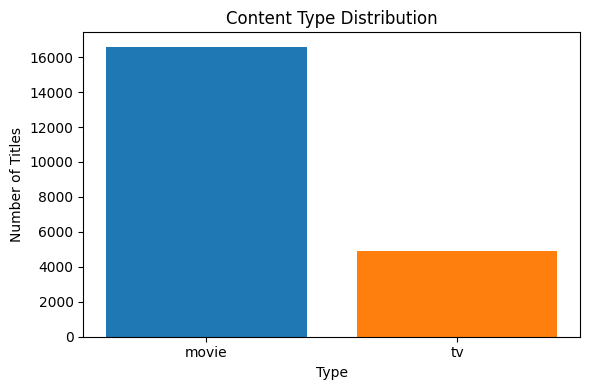

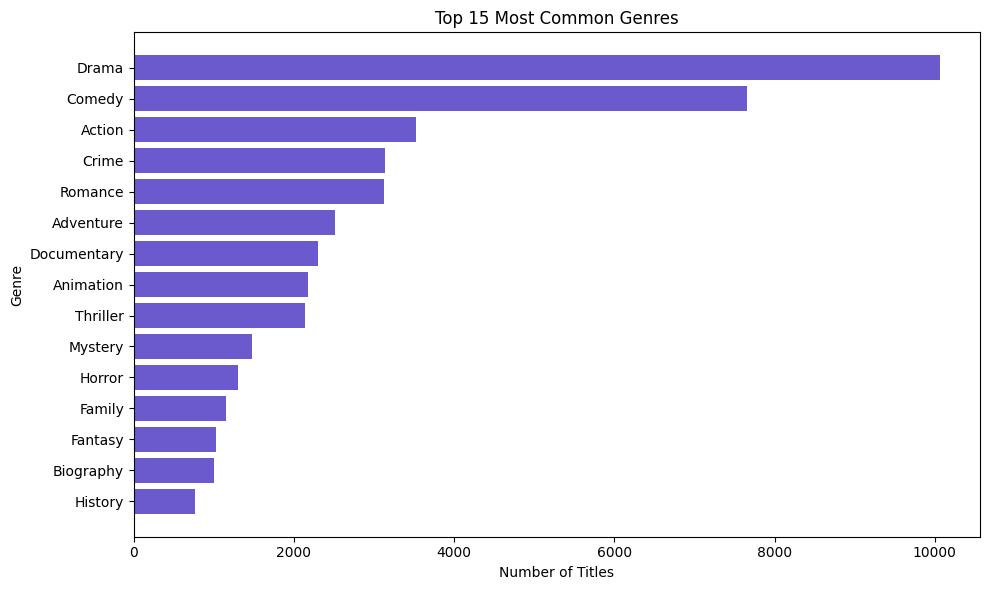

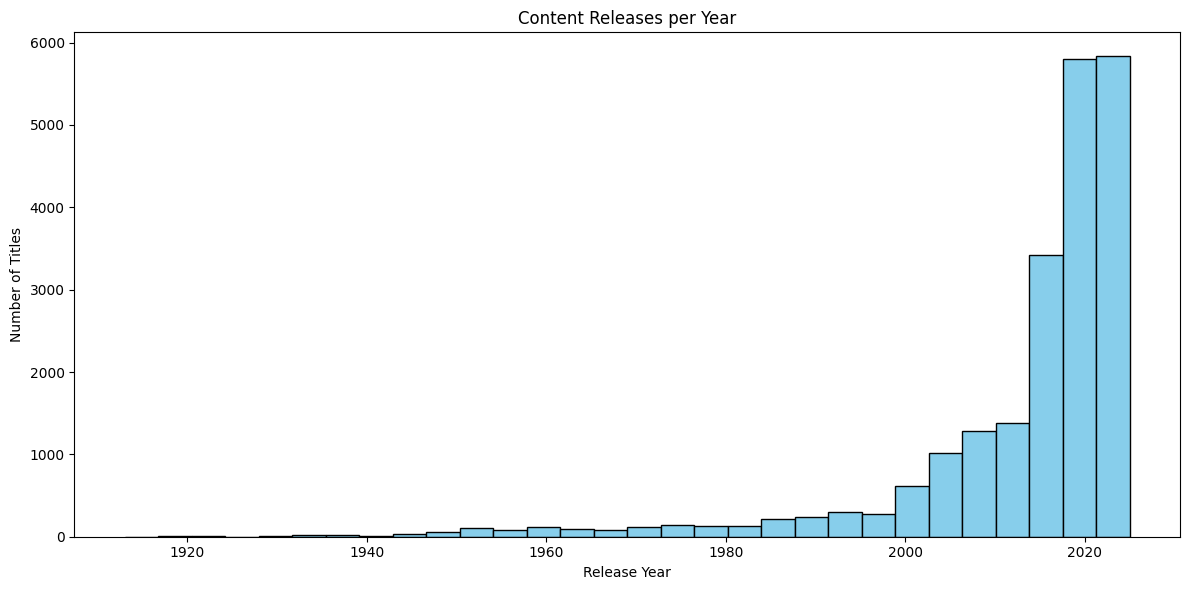

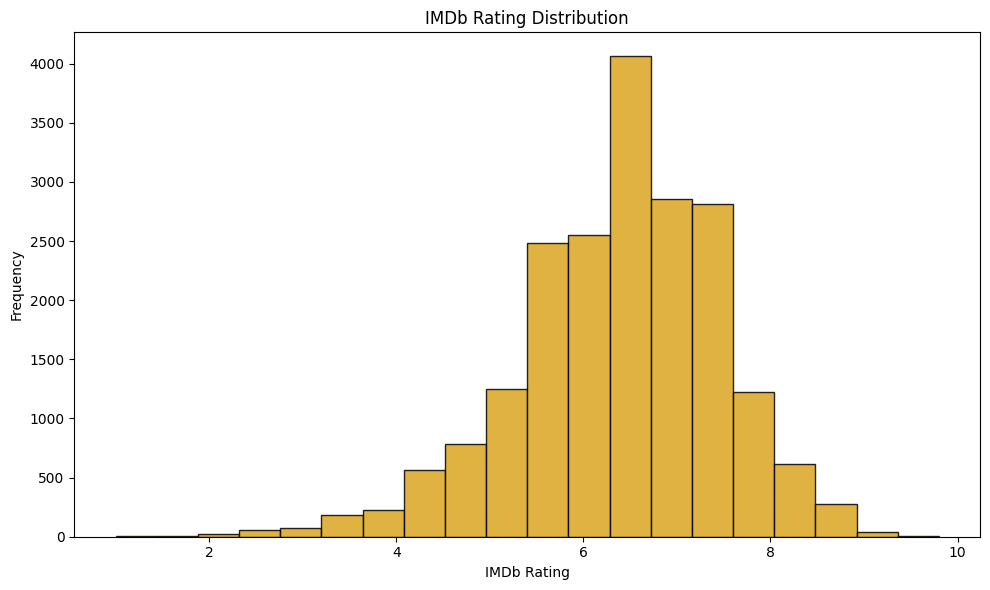

In [ ]:



# 1. Type Distribution (Movies vs Shows)

type_counts = netflix['type'].value_counts()

fig1 = plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


# 2. Genre Frequency (Top 15)

genre_split = netflix['genres'].str.split(', ')
all_genres = genre_split.explode()
genre_counts = all_genres.value_counts().head(15)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index[::-1], genre_counts.values[::-1], color='#6a5acd')
plt.title('Top 15 Most Common Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 3. Release Year Trend

fig3 = plt.figure(figsize=(12, 6))
plt.hist(netflix['releaseYear'], bins=30, color='#87ceeb', edgecolor='black')
plt.title('Content Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


# 4. IMDb Rating Distribution

valid_ratings = netflix['imdbAverageRating'].dropna()

fig4 = plt.figure(figsize=(10, 6))
plt.hist(valid_ratings, bins=20, color='#daa520', edgecolor='black', alpha=0.85)
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Saving results as image
fig1.savefig('type_distribution.png')
fig2.savefig('genre_frequency.png')
fig3.savefig('release_year_trend.png')
fig4.savefig('imdb_rating_distribution.png')


#SECTION 3: Bivariate & Multivariate Analysis

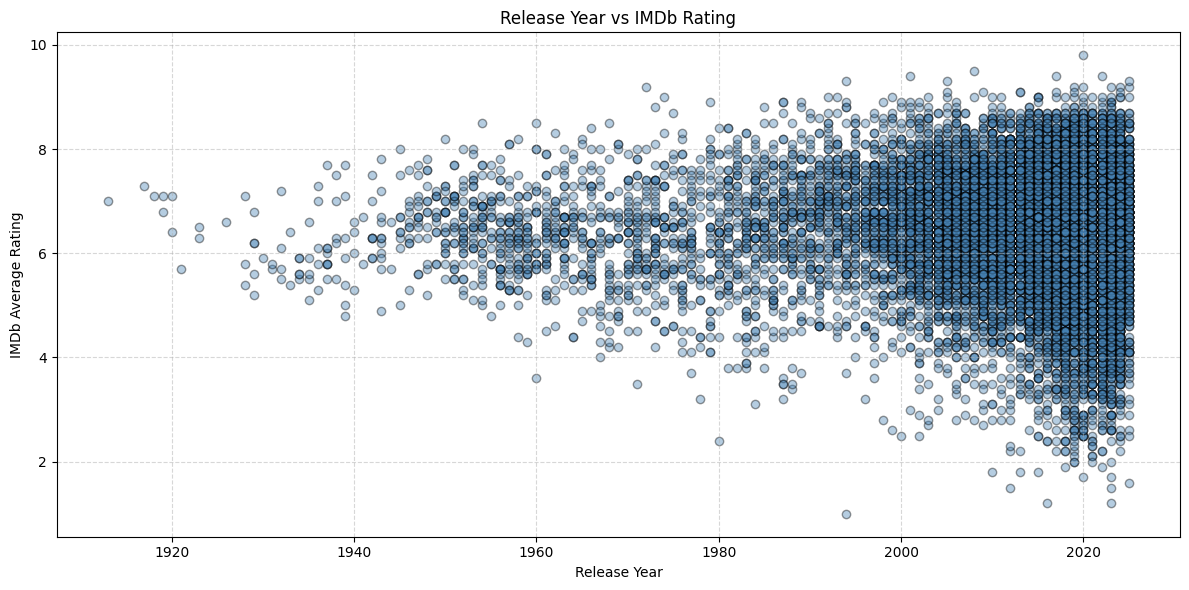

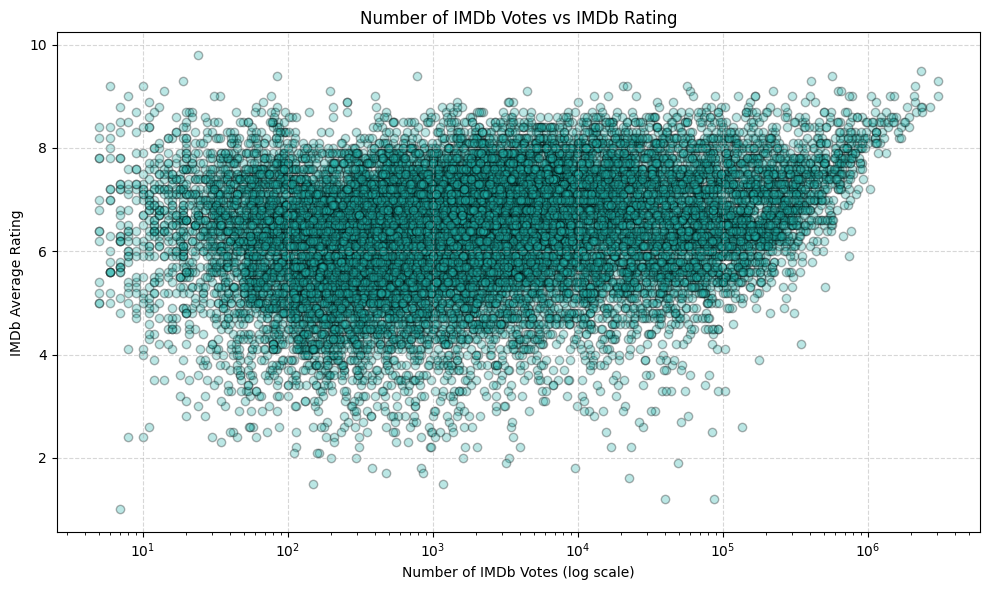

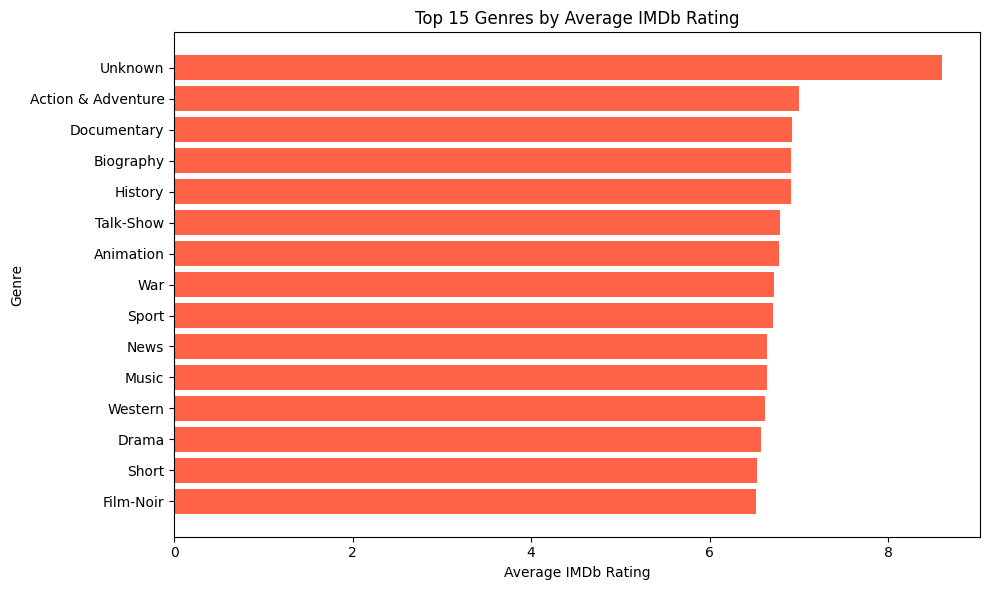

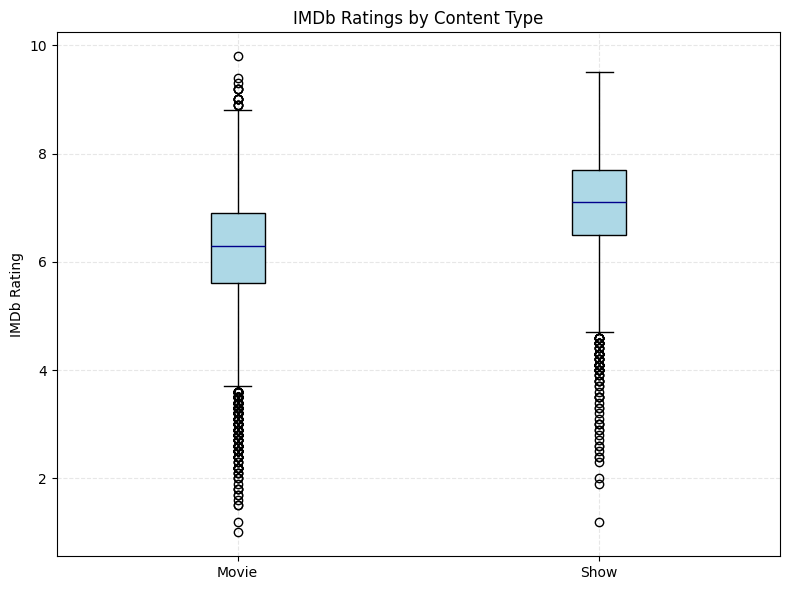

In [ ]:


# 1. Release Year vs IMDb Rating (Scatter Plot)
fig1 = plt.figure(figsize=(12, 6))
plt.scatter(netflix['releaseYear'], netflix['imdbAverageRating'], alpha=0.4, color='#4682b4', edgecolors='k')
plt.title('Release Year vs IMDb Rating')
plt.xlabel('Release Year')
plt.ylabel('IMDb Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Number of IMDb Votes vs IMDb Rating (Scatter Plot)
valid_votes = netflix.dropna(subset=['imdbNumVotes', 'imdbAverageRating'])

fig2 = plt.figure(figsize=(10, 6))
plt.scatter(valid_votes['imdbNumVotes'], valid_votes['imdbAverageRating'], alpha=0.3, color='#20b2aa', edgecolors='k')
plt.xscale('log')
plt.title('Number of IMDb Votes vs IMDb Rating')
plt.xlabel('Number of IMDb Votes (log scale)')
plt.ylabel('IMDb Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Top Genres by Average Rating (Bar Chart)
genre_ratings = netflix[['genres', 'imdbAverageRating']].dropna()
genre_expanded = genre_ratings.assign(genres=genre_ratings['genres'].str.split(', ')).explode('genres')
genre_grouped = genre_expanded.groupby('genres')['imdbAverageRating'].mean().sort_values(ascending=False).head(15)

fig3 = plt.figure(figsize=(10, 6))
plt.barh(genre_grouped.index[::-1], genre_grouped.values[::-1], color='#ff6347')
plt.title('Top 15 Genres by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 4. Content Type vs IMDb Rating (Box Plot)

# Prepare cleaned ratings
movie_ratings = netflix[netflix["type"] == "movie"]["imdbAverageRating"].dropna()
show_ratings = netflix[netflix["type"] == "tv"]["imdbAverageRating"].dropna()

# Plot
fig4 = plt.figure(figsize=(8, 6))
plt.boxplot(
    [movie_ratings, show_ratings],
    labels=['Movie', 'Show'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='darkblue')
)
plt.title('IMDb Ratings by Content Type')
plt.ylabel('IMDb Rating')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

fig1.savefig('release_year_vs_imdb_rating.png')
fig2.savefig('num_imdb_votes_vs_imdb_rating.png')
fig3.savefig('top_genres_by_avg_rating.png')
fig4.savefig('content_type_vs_imdb_rating.png')


# SECTION 4: Country Availability Analysis

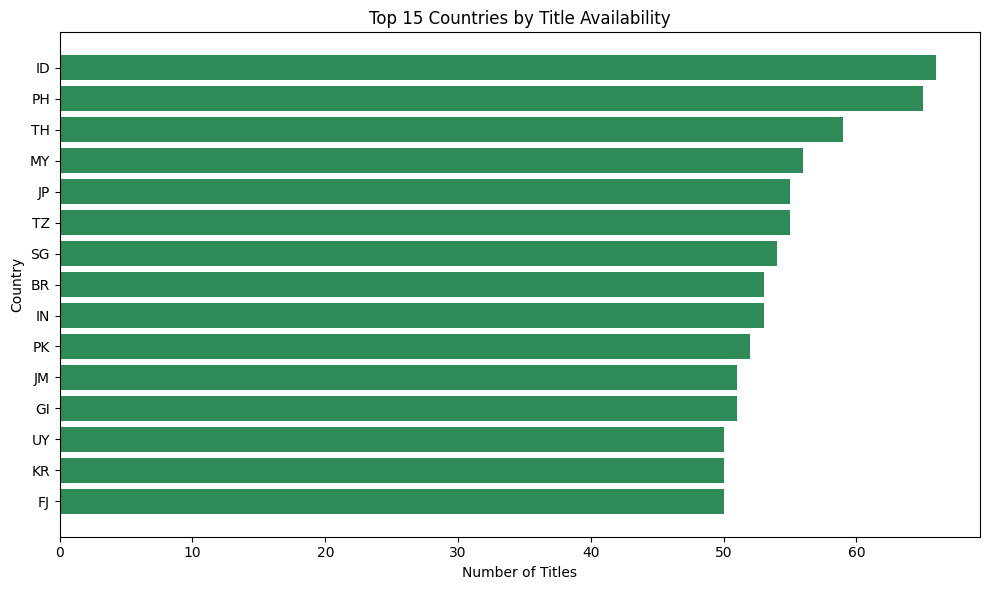

In [ ]:
# Filter titles with non-missing country info
available_data = netflix.dropna(subset=['availableCountries'])

# Split and explode into individual country entries
country_expanded = available_data.assign(
    availableCountries=available_data['availableCountries'].str.split(', ')
).explode('availableCountries')

# Count frequency of each country
country_counts = country_expanded['availableCountries'].value_counts().head(15)

# Plot top 15 countries with the most available titles


fig = plt.figure(figsize=(10, 6))
plt.barh(country_counts.index[::-1], country_counts.values[::-1], color='#2e8b57')
plt.title('Top 15 Countries by Title Availability')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#SECTION 5: Summary & Key Insights
# Netflix Titles Dataset: Exploratory Data Analysis

## 1. Dataset Overview & Cleaning

**Original shape:** 21,917 rows × 8 columns  
**Cleaned shape:** 21,507 rows × 8 columns  

**Cleaning Steps:**
- Filled missing `genres` with `'Unknown'`
- Dropped rows with missing `releaseYear`
- Converted `releaseYear` to `int` and parsed numeric columns
- Removed duplicates  
- Left `availableCountries` mostly untouched due to 99.3% null values

---

## 2. Univariate Analysis

### 2.1 Content Type Distribution
- Majority of titles are **movies**, with a smaller but notable count of **shows**.


### 2.2 Genre Frequency
- Most frequent genres include Drama, Comedy, Action, and Documentary.


### 2.3 Release Year Trend
- Peak in release years between 2017–2020.
- Significant growth in releases post-2000.



### 2.4 IMDb Rating Distribution
- Ratings mostly fall between 5.0 and 8.0.



---

## 3. Bivariate & Multivariate Analysis

### 3.1 Release Year vs IMDb Rating
- No strong correlation. Ratings are steady across years.


### 3.2 Number of Votes vs IMDb Rating
- Higher vote counts show less rating variance.



### 3.3 Top Genres by Rating
- War, Biography, and History genres rated the highest.


### 3.4 Type vs Rating Boxplot
- Movies show slightly higher rating variance than shows.


---

## 4. Country Availability

### Insight:
- Only ~0.7% of titles had country data.
- Among those, US, India, and UK appeared most frequently.

# Netflix Titles Dataset: Exploratory Data Analysis

## 1. Dataset Overview & Cleaning

**Original shape:** 21,917 rows × 8 columns  
**Cleaned shape:** 21,507 rows × 8 columns  

**Cleaning Steps:**
- Filled missing `genres` with `'Unknown'`
- Dropped rows with missing `releaseYear`
- Converted `releaseYear` to `int` and parsed numeric columns
- Removed duplicates  
- Left `availableCountries` mostly untouched due to 99.3% null values

---

## 2. Univariate Analysis

### 2.1 Content Type Distribution
- Majority of titles are **movies**, with a smaller but notable count of **shows**.


### 2.2 Genre Frequency
- Most frequent genres include Drama, Comedy, Action, and Documentary.


### 2.3 Release Year Trend
- Peak in release years between 2017–2020.
- Significant growth in releases post-2000.


### 2.4 IMDb Rating Distribution
- Ratings mostly fall between 5.0 and 8.0.


---

## 3. Bivariate & Multivariate Analysis

### 3.1 Release Year vs IMDb Rating
- No strong correlation. Ratings are steady across years.


### 3.2 Number of Votes vs IMDb Rating
- Higher vote counts show less rating variance.


### 3.3 Top Genres by Rating
- War, Biography, and History genres rated the highest.

### 3.4 Type vs Rating Boxplot
- Movies show slightly higher rating variance than shows.

---

## 4. Country Availability

### Insight:
- Only ~0.7% of titles had country data.
- Among those, US, India, and UK appeared most frequently.

---

## 5. Summary & Insights

- The dataset favors recent content, especially 2017–2020.
- Drama and Comedy dominate in frequency.
- High IMDb ratings are associated with niche genres.
- IMDb vote count shows slight correlation with rating stability.
- `availableCountries` data is largely missing and not reliable for detailed insight.



---

## 5. Summary & Insights

- The dataset favors recent content, especially 2017–2020.
- Drama and Comedy dominate in frequency.
- High IMDb ratings are associated with niche genres.
- IMDb vote count shows slight correlation with rating stability.
- `availableCountries` data is largely missing and not reliable for detailed insight.

